# Importações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?`

-`3. Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?`

-`4. Quem faz atividade física tem menos casos de ataque cardíaco`

-`5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?`

-`6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?`

-`7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`


In [3]:
df = pd.read_csv("dataset/heart_attack_russia_youth_vs_adult.csv")

# Como estão meus dados ? 

In [ ]:
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [42]:
df.describe(include='all')

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
count,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000.00000,50000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3,2,...,3,3,3,4,2,2,NaN,NaN,NaN,2
top,NaN,NaN,Female,Urban,NaN,NaN,NaN,NaN,Moderate,False,...,Middle,Moderate,Secondary,Married,Urban,False,NaN,NaN,NaN,False
freq,NaN,NaN,24155,25034,NaN,NaN,NaN,NaN,24946,35008,...,20025,24828,20064,25099,30142,39963,NaN,NaN,NaN,39935
mean,25000.500000,35.991820,NaN,NaN,120.058636,199.852762,24.983912,79.988980,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.007100,2.997782,5.48674,NaN
std,14433.901067,14.110139,NaN,NaN,14.975835,49.998331,5.003784,11.804567,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.410351,1.149608,2.86076,NaN
min,1.000000,12.000000,NaN,NaN,60.000000,-18.700000,2.900000,60.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.00000,NaN
25%,12500.750000,24.000000,NaN,NaN,109.900000,166.100000,21.600000,70.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.00000,NaN
50%,25000.500000,36.000000,NaN,NaN,120.050000,199.900000,25.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,5.00000,NaN
75%,37500.250000,48.000000,NaN,NaN,130.200000,233.500000,28.400000,90.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,8.00000,NaN


In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [43]:
df[['Urban_Rural','Region']]

,Urban_Rural,Region
0,Rural,Rural
1,Urban,Urban
2,Urban,Rural
3,Urban,Rural
4,Urban,Urban
...,...,...
49995,Urban,Rural
49996,Urban,Rural
49997,Urban,Suburban
49998,Urban,Rural


In [52]:
df['Region'].value_counts()

Region
Urban       25034
Rural       14946
Suburban    10020
Name: count, dtype: int64

In [53]:
df['Urban_Rural'].value_counts()

Urban_Rural
Urban    30142
Rural    19858
Name: count, dtype: int64

In [54]:
df.isnull().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [57]:
df[df.duplicated()]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


## Comentários breves:

### Aparentemente não há muitos problemas nos dados, tem uma coluna que não é específicado o que é `Urban_Rural` e tem a `Region`.  A única coluna com valores nulos é para consumo de álcool (`Alcohol_Consumption`). Existe dois pacientes com valores negativos no colesterol.

# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?

### Objetivos:
- Exibir a ocorrência de casos para homens e para mulheres
- Exibir o número de casos de cada gênero pela faixa etária

In [13]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('Gender')['Heart_Attack'].sum()

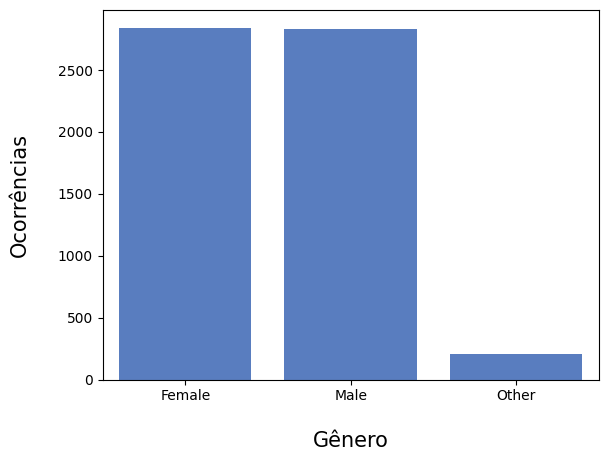

In [17]:
ax = sns.barplot(df_heart_atck_by_gender)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20)
ax.set_xlabel('Gênero', fontsize=15,labelpad = 20)

plt.show()

In [9]:
# Separando em feixa etária a idade 5 em 5 anos
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 65, 5))

# Agrupando por faixa etária removendo os outros, e somando as ocorrencias
df_occurrences_by_age_and_gender = df[(df['Heart_Attack']) & (df['Gender']!='Other')].groupby(['Gender','Age_Group'],observed=True)['Heart_Attack'].sum().reset_index()

# Transformando em string
df_occurrences_by_age_and_gender['Age_Group'] = df_occurrences_by_age_and_gender['Age_Group'].astype(str)

df_occurrences_by_age_and_gender

,Gender,Age_Group,Heart_Attack
0,Female,"(10, 15]",219
1,Female,"(15, 20]",305
2,Female,"(20, 25]",297
3,Female,"(25, 30]",297
4,Female,"(30, 35]",296
5,Female,"(35, 40]",311
6,Female,"(40, 45]",283
7,Female,"(45, 50]",279
8,Female,"(50, 55]",287
9,Female,"(55, 60]",269


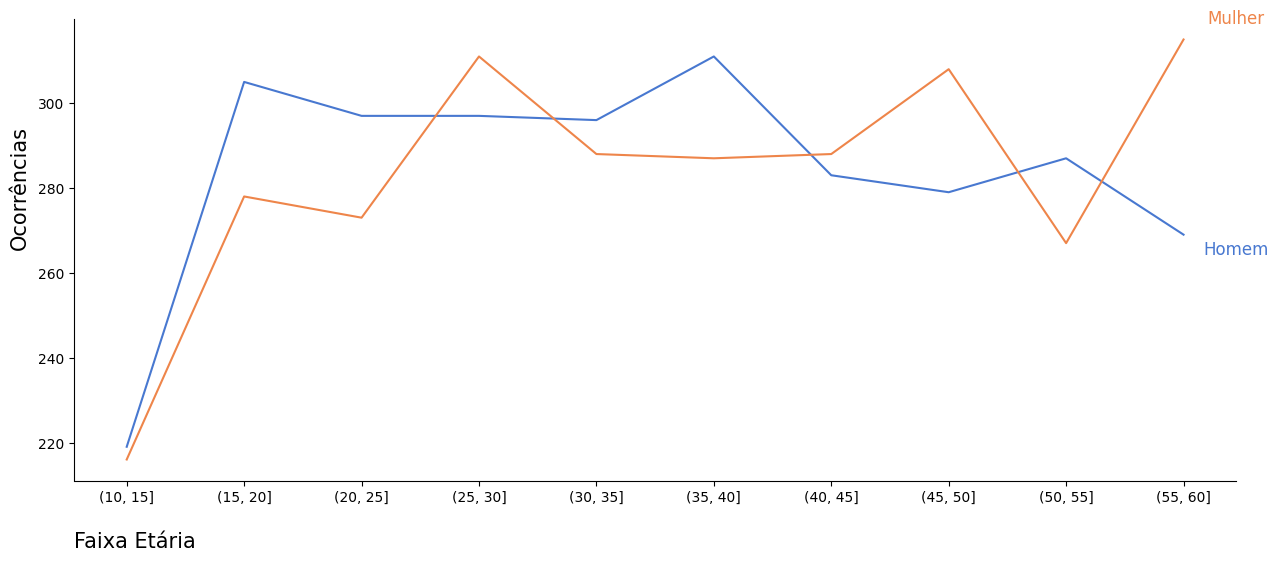

In [10]:
# Escolhendo essa paleta de cores
sns.set_palette("muted")

# Construindo o gráfico
plt.figure(figsize=(15, 6))

ax = sns.lineplot(y='Heart_Attack',x='Age_Group',hue='Gender',data=df_occurrences_by_age_and_gender)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('Faixa Etária', fontsize=15,labelpad = 20,loc='left')

# Removendo linhas de grade para maior clareza
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

ax.legend().set_visible(False)
ax.text(1, 1, "Mulher", ha='center', va='center', transform=ax.transAxes, fontsize=12, color='#EE854A')
ax.text(1, 0.5, "Homem", ha='center', va='center', transform=ax.transAxes, fontsize=12, color ='#4878D0')
plt.show()

In [11]:
z_scores = stats.zscore(df_occurrences_by_age_and_gender['Heart_Attack'])

# Filtrar outliers
outliers = df_occurrences_by_age_and_gender[np.abs(z_scores) > 2]  # Usando 2 como o limite

print("Outliers detectados:")
print(outliers)

Outliers detectados:
    Gender Age_Group  Heart_Attack
0   Female  (10, 15]           219
10    Male  (10, 15]           216


## Conclusões:
Não há uma diferença entre a quantidade de casos em homem e em mulheres, além disso , não foi evidenciado nenhuma faixa de valor em que ocorrece mais casos, porém faixas etárias menores não exibem uma quantidade grande de casos, a princípio a partir dos 30 anos parece haver uma constância de casos tanto para homens quanto para mulheres.

# 2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?